In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = np.load('x5-arsenal.npy')
y = np.load('y5-arsenal.npy')

In [4]:
X.shape, y.shape

((119, 50, 50), (119,))

In [5]:
class_name = ["leno", "ramsdale", "saka", "smith_rowe", "tavares"]

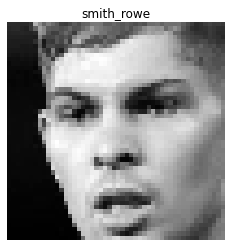

In [6]:
def plot_sample(X,y,index):
    plt.imshow(X[index],cmap='gray')
    plt.title(class_name[y[index]])
    plt.axis('off')
    plt.show()
plot_sample(X,y,24)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=42)
x_train.shape, y_train.shape

((89, 50, 50), (89,))

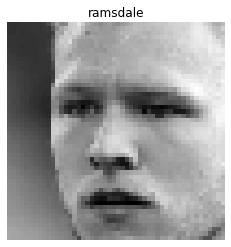

In [11]:
plot_sample(x_train,y_train,57)

In [24]:
x_train.shape

(89, 50, 50)

In [26]:
x_train = x_train.reshape(-1,50,50,1)
x_test = x_test.reshape(-1,50,50,1)

Filters (Convolution Kernels)
A filter (or kernel) is an integral component of the layered architecture.

Generally, it refers to an operator applied to the entirety of the image such that it transforms the information encoded in the pixels. In practice, however, a kernel is a smaller-sized matrix in comparison to the input dimensions of the image, that consists of real valued entries.

The kernels are then convolved with the input volume to obtain so-called ‘activation maps’. Activation maps indicate ‘activated’ regions, i.e. regions where features specific to the kernel have been detected in the input. The real values of the kernel matrix change with each learning iteration over the training set, indicating that the network is learning to identify which regions are of significance for extracting features from the data.

In [196]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(2,2),input_shape=(50,50,1),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(624,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax'),
])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=50,validation_split=.1,batch_size=20,callbacks=[early])

Epoch 1/50
4/4 [==============================] - 1s 92ms/step - loss: 1.6315 - accuracy: 0.1750 - val_loss: 1.5897 - val_accuracy: 0.2222
Epoch 2/50
4/4 [==============================] - 0s 52ms/step - loss: 1.5788 - accuracy: 0.2875 - val_loss: 1.5736 - val_accuracy: 0.2222
Epoch 3/50
4/4 [==============================] - 0s 52ms/step - loss: 1.5337 - accuracy: 0.2875 - val_loss: 1.5800 - val_accuracy: 0.2222
Epoch 4/50
4/4 [==============================] - 0s 51ms/step - loss: 1.5026 - accuracy: 0.2875 - val_loss: 1.5559 - val_accuracy: 0.2222
Epoch 5/50
4/4 [==============================] - 0s 51ms/step - loss: 1.4188 - accuracy: 0.2875 - val_loss: 1.4485 - val_accuracy: 0.2222
Epoch 6/50
4/4 [==============================] - 0s 47ms/step - loss: 1.3355 - accuracy: 0.4500 - val_loss: 1.3855 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 0s 52ms/step - loss: 1.2010 - accuracy: 0.5500 - val_loss: 1.3228 - val_accuracy: 0.4444
Epoch 8/50
4/4 [===========

In [197]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.7913 - accuracy: 0.8333


[0.7913375496864319, 0.8333333134651184]

> 83% accuracy!

In [199]:
prob = model.predict(x_test)
prob[0]

array([1.1198518e-06, 2.5722493e-09, 9.5594567e-01, 4.2822860e-02,
       1.2302834e-03], dtype=float32)

In [200]:
pred = prob.argmax(axis=1)
sure = np.round(prob.max(axis=1)*100,0)
pred[0], sure[0]

(2, 96.0)

In [201]:
prob[3]

array([3.9455899e-06, 1.0135075e-08, 5.4766488e-01, 4.8810506e-04,
       4.5184314e-01], dtype=float32)

In [202]:
pred, y_test

(array([2, 4, 0, 2, 1, 1, 1, 3, 3, 0, 3, 2, 0, 0, 4, 0, 4, 0, 1, 3, 2, 4,
        0, 0, 3, 1, 3, 1, 0, 3], dtype=int64),
 array([2, 4, 0, 4, 1, 1, 1, 3, 3, 0, 3, 4, 0, 0, 4, 0, 4, 0, 1, 3, 4, 4,
        0, 0, 1, 1, 3, 0, 0, 3]))

In [203]:
def plot_predict(figsize,sample,x_test,y_test,pred,sure):
    plt.figure(figsize=figsize)
    num = [i for i in range(len(x_test))]
    
    for i in range(1, sample+1):
        plt.subplot(int(sample**(1/2)), int(sample**(1/2)), i)
        plt.axis('off')

        n = np.random.choice(num)
        if n in num :
            plt.imshow(x_test[n],cmap='gray')
            title = pred[n]
            color = 'blue' if title == y_test[n] else 'red'
            title = class_name[title]
            title = f'{title} with {sure[n]}%'
            plt.title(title,color=color)
            num.remove(n)

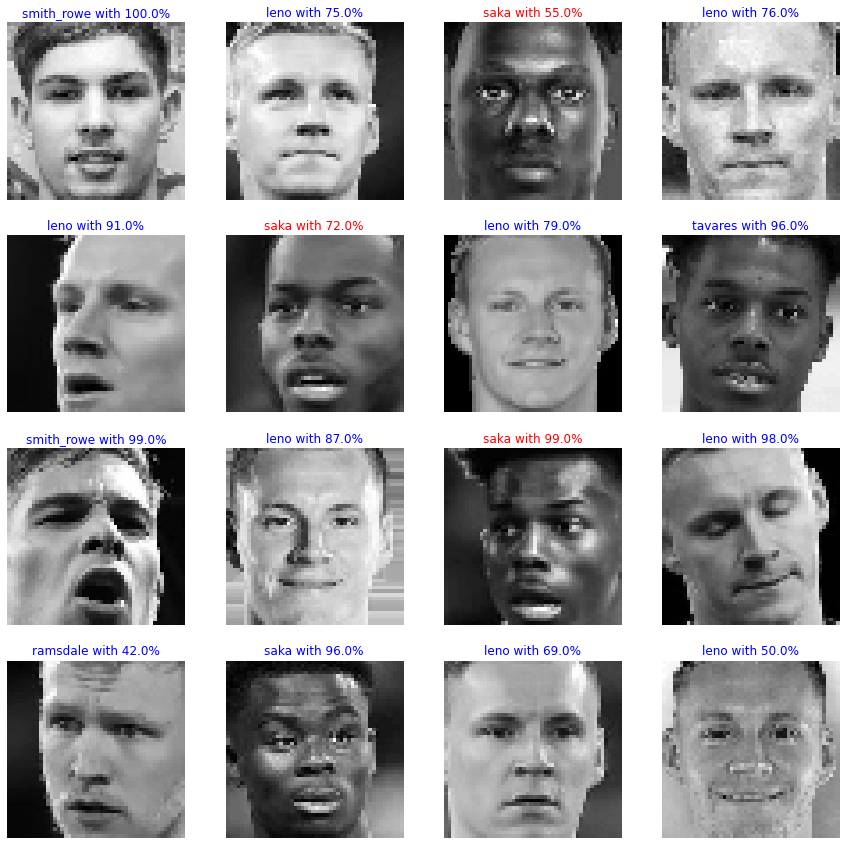

In [223]:
plot_predict((15,15),16,x_test,y_test,pred,sure)